# Network motifs and species centrality

In [1]:
using EcologicalNetworks
using EcologicalNetworksPlots
using Plots

┌ Info: Recompiling stale cache file /home/tpoisot/.julia/compiled/v1.2/EcologicalNetworks/z2ONi.ji for EcologicalNetworks [f03a62fe-f8ab-5b77-a061-bb599b765229]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file /home/tpoisot/.julia/compiled/v1.2/EcologicalNetworksPlots/UMZhI.ji for EcologicalNetworksPlots [9f7a259d-73a7-556d-a7a2-3eb122d3865b]
└ @ Base loading.jl:1240


## Motifs

In [5]:
# Charger les données (réseau numéro 6)
N = nz_stream_foodweb()[6]

49×49 unipartite  ecological network (Bool, String) (L: 110)

In [8]:
S1 = unipartitemotifs().S1

3×3 unipartite  ecological network (Bool, Symbol) (L: 2)

In [10]:
S1.A

3×3 Array{Bool,2}:
 0  1  0
 0  0  1
 0  0  0

In [11]:
interactions(S1)

2-element Array{NamedTuple,1}:
 (from = :a, to = :b)
 (from = :b, to = :c)

In [14]:
motif_s1 = find_motif(N, S1)

59-element Array{Any,1}:
 (["Unidentified detritus", "Austrosimulium", "Galaxias"],)              
 (["Unidentified detritus", "Cristaperla", "Hydrobiosis silvicola"],)    
 (["Unidentified detritus", "Cristaperla", "Stenoperla prasinia"],)      
 (["Unidentified detritus", "Deleatidium", "Stenoperla prasinia"],)      
 (["Unidentified detritus", "Deleatidium", "Galaxias"],)                 
 (["Unidentified detritus", "Hydora nitida l", "Hydrobiosis silvicola"],)
 (["Unidentified detritus", "Isopoda", "Galaxias"],)                     
 (["Unidentified detritus", "Lumbriculiid pink", "Psilachorema"],)       
 (["Unidentified detritus", "Lumbriculiid pink", "Stenoperla prasinia"],)
 (["Unidentified detritus", "Lumbriculiid pink", "Galaxias"],)           
 (["Unidentified detritus", "Oligo I", "Stenoperla prasinia"],)          
 (["Unidentified detritus", "Oligo I", "Galaxias"],)                     
 (["Unidentified detritus", "Paracalliope other", "Galaxias"],)          
 ⋮           

In [15]:
motif_s1[1]

(["Unidentified detritus", "Austrosimulium", "Galaxias"],)

In [18]:
interactions(N[motif_s1[1]...])

2-element Array{NamedTuple,1}:
 (from = "Austrosimulium", to = "Unidentified detritus")
 (from = "Galaxias", to = "Austrosimulium")             

## Centrality

In [19]:
?centrality_katz

search: centrality_katz centrality_degree centrality_closeness



```
centrality_katz(N::Unipartite; a::Float64=0.1, k::Int64=5)
```

This measure can work on different path length (`k`), and give a different weight to every subsequent connection (`a`). `k` must be at least 1 (only immediate neighbors are considered). `a` (being a weight), must be positive.

> Katz, L., 1953. A new status index derived from sociometric analysis. Psychometrika 18, 39–43. doi:10.1007/bf02289026



In [20]:
N = simplify(nz_stream_foodweb()[6]) # Example data
cc = centrality_closeness(N);
cd = centrality_degree(N);
ck = centrality_katz(N);

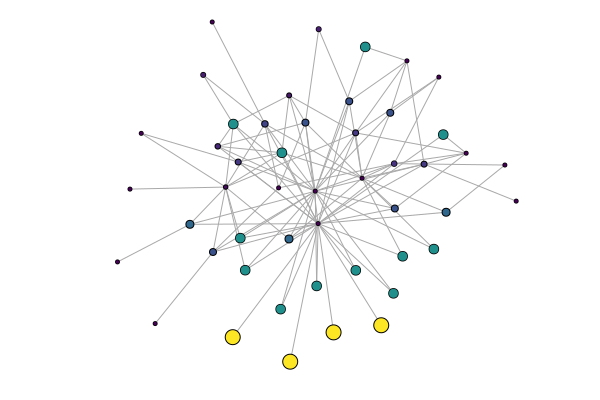

In [23]:
I = initial(RandomInitialLayout, N)
for step in 1:4000
  position!(ForceDirectedLayout(2.5), I, N)
end
plot(I, N, aspectratio=1)
scatter!(I, N, nodefill=cc, nodesize=cc, mc=:viridis)

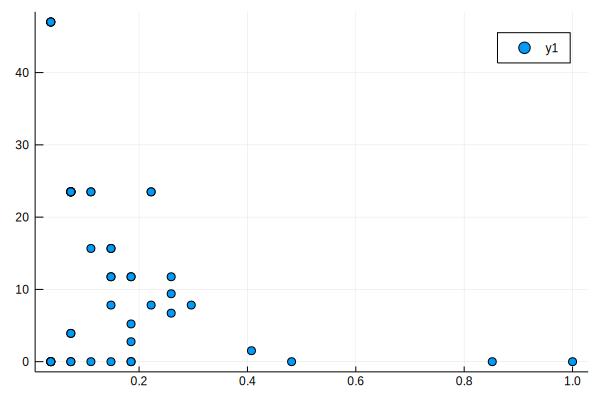

In [26]:
scatter(collect(values(cd)), collect(values(cc)))

In [28]:
# Node with the highest Katz centrality
findmax(cc)

(47.0, "Cricotopus II")